In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

In [59]:
from nj_covid_scrapper import *

ModuleNotFoundError: No module named 'selenium'

In [2]:
import os
os.listdir()

['.DS_Store',
 'images',
 'nj_covid_scrapper.py',
 'NJ Vaccine Data.ipynb',
 '.ipynb_checkpoints',
 'data',
 'warframeWikiScrapper.py',
 '.idea']

In [2]:
list(filter(lambda s: '.csv' in s, os.listdir()))

['vax_by_county.csv',
 'vax_plus_covid.csv',
 'vc_scaled.csv',
 'all_nyt.csv',
 'vax_by_county_0126.csv',
 'covid_by_county_0126.csv']

In [3]:
list(filter(lambda s: '.svg' in s, os.listdir()))

['USA_New_Jersey_location_map.svg', 'New_Jersey_Counties_Outline.svg']

In [41]:
vc = pd.read_csv("vc_scaled.csv")

In [42]:
vc.index = vc.county; vc.drop("county", axis=1, inplace=True);vc

,vaccines,deaths,cases,vd_diff,vc_diff
county,,,,,
atlantic,0.032467,0.022861,0.027624,0.009606,0.004844
bergen,0.117472,0.114939,0.096778,0.002533,0.020694
burlington,0.053636,0.033080,0.045082,0.020556,0.008554
camden,0.063161,0.048357,0.058980,0.014804,0.004181
cape_may,0.015382,0.007375,0.005163,0.008008,0.010220
cumberland,0.016677,0.014433,0.017325,0.002244,-0.000648
essex,0.084203,0.118890,0.096020,-0.034687,-0.011817
gloucester,0.037734,0.024389,0.030778,0.013345,0.006956
hudson,0.049187,0.087916,0.091304,-0.038729,-0.042117


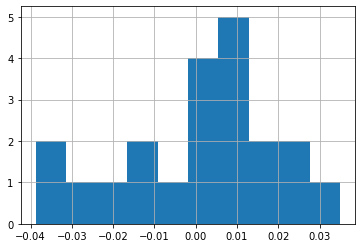

In [43]:
vc.vd_diff.sort_values().hist()

(2.3129646346357427e-18,
 0.0002889387210333594,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fa93ba783d0>)

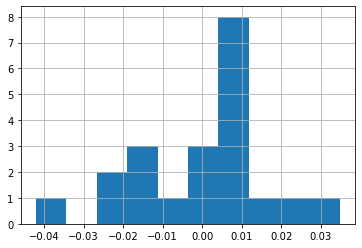

In [44]:
cases = vc.vc_diff.sort_values()
cases.mean(), cases.var(), cases.hist()

((array([-1.84569542, -1.41352783, -1.14765351, -0.94487504, -0.77501005,
         -0.62504005, -0.48799157, -0.35957249, -0.23684388, -0.11759451,
          0.        ,  0.11759451,  0.23684388,  0.35957249,  0.48799157,
          0.62504005,  0.77501005,  0.94487504,  1.14765351,  1.41352783,
          1.84569542]),
  array([-0.03872898, -0.03468655, -0.02431016, -0.02330904, -0.01524845,
         -0.01313808, -0.00779531, -0.0007276 ,  0.00126272,  0.00224391,
          0.00253289,  0.00691337,  0.00800771,  0.00960472,  0.00960594,
          0.01124142,  0.01334471,  0.01480423,  0.02055556,  0.02285791,
          0.03496906])),
 (0.01971748712710367, 4.877585266009721e-19, 0.9811266375291497))

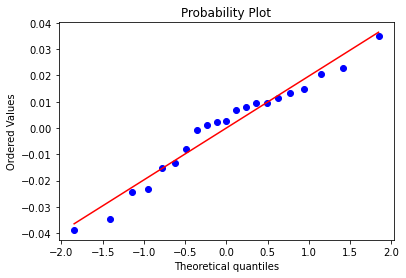

In [45]:
stats.probplot(vc.vd_diff.sort_values(), dist="norm", plot=plt)

((array([-1.84569542, -1.41352783, -1.14765351, -0.94487504, -0.77501005,
         -0.62504005, -0.48799157, -0.35957249, -0.23684388, -0.11759451,
          0.        ,  0.11759451,  0.23684388,  0.35957249,  0.48799157,
          0.62504005,  0.77501005,  0.94487504,  1.14765351,  1.41352783,
          1.84569542]),
  array([-0.0421172 , -0.02538332, -0.01981183, -0.01585467, -0.01181667,
         -0.01144687, -0.00598924, -0.000648  , -0.00049068,  0.00210904,
          0.00418053,  0.00484355,  0.006308  ,  0.00695581,  0.0075298 ,
          0.00855417,  0.01021972,  0.01029711,  0.01692501,  0.02069389,
          0.03494182])),
 (0.017420414799033477, -4.063591706104285e-19, 0.9745791125913562))

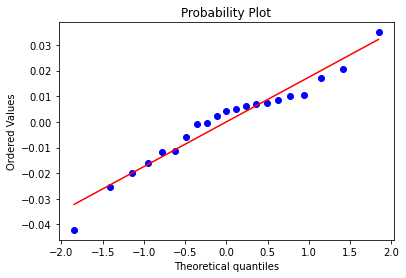

In [46]:
stats.probplot(vc.vc_diff.sort_values(), dist="norm", plot=plt)

In [47]:
vc.sort_values(by="vc_diff")

,vaccines,deaths,cases,vd_diff,vc_diff
county,,,,,
hudson,0.049187,0.087916,0.091304,-0.038729,-0.042117
passaic,0.051175,0.074484,0.076558,-0.023309,-0.025383
union,0.052649,0.076960,0.072461,-0.024310,-0.019812
middlesex,0.079857,0.087653,0.095712,-0.007795,-0.015855
essex,0.084203,0.118890,0.096020,-0.034687,-0.011817
mercer,0.026843,0.039981,0.038290,-0.013138,-0.011447
ocean,0.065451,0.080700,0.071440,-0.015248,-0.005989
cumberland,0.016677,0.014433,0.017325,0.002244,-0.000648
salem,0.005804,0.006532,0.006295,-0.000728,-0.000491


In [35]:
df = pd.read_csv("./data/nj_covid_2021-02-02.csv", index_col=0)
df

,Confirmed Cases,Confirmed Deaths,New Confirmed Cases,New Probable Cases,Probable Cases,Probable Deaths,Vaccine Doses
County,,,,,,,
atlantic,17433,462,76,27,4388,22,24689
bergen,60817,2215,282,66,7095,268,89499
burlington,28190,640,152,39,3696,48,40730
camden,36679,959,119,24,3996,69,48195
cape_may,3231,142,19,26,3046,20,12143
cumberland,10882,289,58,9,2079,14,11835
essex,60546,2289,262,38,5239,255,66769
gloucester,19291,478,84,16,2802,22,28022
hudson,57078,1697,155,44,4706,171,37417


In [36]:
(df["Vaccine Doses"] - df["Vaccine Doses"].mean())/df["Vaccine Doses"].std()

County
atlantic     -0.513974
bergen        2.307348
burlington    0.184326
camden        0.509294
cape_may     -1.060130
cumberland   -1.073537
essex         1.317861
gloucester   -0.368882
hudson        0.040104
hunterdon    -1.092169
mercer       -0.609702
middlesex     1.071120
monmouth      1.144907
morris        1.045523
ocean         0.620954
passaic       0.116503
salem        -1.375651
somerset     -0.188397
sussex       -0.996442
union         0.149631
warren       -1.228686
Name: Vaccine Doses, dtype: float64

In [42]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(df)
ndf = pd.DataFrame(scaler.transform(df))
ndf.index = df.index
ndf.columns = df.columns
ndf

,Confirmed Cases,Confirmed Deaths,New Confirmed Cases,New Probable Cases,Probable Cases,Probable Deaths,Vaccine Doses
County,,,,,,,
atlantic,-0.617394,-0.678756,-0.592655,0.028659,0.451186,-0.949776,-0.526667
bergen,1.528081,1.883229,1.538538,2.162456,1.871529,1.993562,2.364328
burlington,-0.085427,-0.418611,0.193610,0.685212,0.088098,-0.638692,0.188878
camden,0.334381,0.047603,-0.147794,-0.135479,0.245506,-0.387431,0.521871
cape_may,-1.319728,-1.146431,-1.182354,-0.026054,-0.252952,-0.973706,-1.086310
cumberland,-0.941362,-0.931593,-0.778875,-0.956170,-0.760330,-1.045495,-1.100049
essex,1.514679,1.991379,1.331626,0.630499,0.897699,1.838019,1.350406
gloucester,-0.525510,-0.655372,-0.509890,-0.573181,-0.380977,-0.949776,-0.377991
hudson,1.343176,1.126179,0.224647,0.958776,0.618038,0.832977,0.041094


In [49]:
ndf["Vaccine-Case Discrepancy"] = ndf["Vaccine Doses"] - ndf["Confirmed Cases"]
ndf["Vaccine-Death Discrepancy"] = ndf["Vaccine Doses"] - ndf["Confirmed Deaths"]
ndf

,Confirmed Cases,Confirmed Deaths,New Confirmed Cases,New Probable Cases,Probable Cases,Probable Deaths,Vaccine Doses,Vaccine-Case Discrepancy,Vaccine-Death Discrepancy
County,,,,,,,,,
atlantic,-0.617394,-0.678756,-0.592655,0.028659,0.451186,-0.949776,-0.526667,0.090727,0.152089
bergen,1.528081,1.883229,1.538538,2.162456,1.871529,1.993562,2.364328,0.836247,0.481099
burlington,-0.085427,-0.418611,0.193610,0.685212,0.088098,-0.638692,0.188878,0.274304,0.607489
camden,0.334381,0.047603,-0.147794,-0.135479,0.245506,-0.387431,0.521871,0.187490,0.474268
cape_may,-1.319728,-1.146431,-1.182354,-0.026054,-0.252952,-0.973706,-1.086310,0.233418,0.060122
cumberland,-0.941362,-0.931593,-0.778875,-0.956170,-0.760330,-1.045495,-1.100049,-0.158687,-0.168456
essex,1.514679,1.991379,1.331626,0.630499,0.897699,1.838019,1.350406,-0.164273,-0.640973
gloucester,-0.525510,-0.655372,-0.509890,-0.573181,-0.380977,-0.949776,-0.377991,0.147519,0.277381
hudson,1.343176,1.126179,0.224647,0.958776,0.618038,0.832977,0.041094,-1.302082,-1.085085


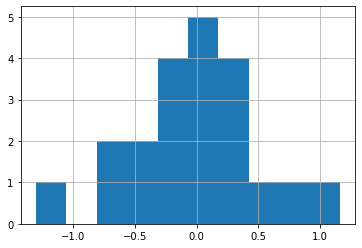

In [52]:
ndf["Vaccine-Case Discrepancy"].hist()

((array([-1.84569542, -1.41352783, -1.14765351, -0.94487504, -0.77501005,
         -0.62504005, -0.48799157, -0.35957249, -0.23684388, -0.11759451,
          0.        ,  0.11759451,  0.23684388,  0.35957249,  0.48799157,
          0.62504005,  0.77501005,  0.94487504,  1.14765351,  1.41352783,
          1.84569542]),
  array([-1.30208165, -0.76294213, -0.58741168, -0.41626655, -0.32737547,
         -0.16427341, -0.15868683, -0.12685136, -0.12421559, -0.05462578,
          0.09072712,  0.09287831,  0.11194351,  0.14751912,  0.18748979,
          0.23341818,  0.27430445,  0.41844843,  0.46969321,  0.83624737,
          1.16206098])),
 (0.5455024425800721, -1.1823356865326706e-16, 0.9759021155514553))

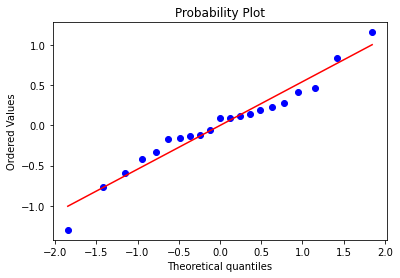

In [58]:
stats.probplot(ndf["Vaccine-Case Discrepancy"], dist="norm", plot=plt)

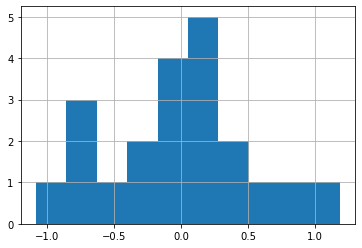

In [56]:
ndf["Vaccine-Death Discrepancy"].hist()

((array([-1.84569542, -1.41352783, -1.14765351, -0.94487504, -0.77501005,
         -0.62504005, -0.48799157, -0.35957249, -0.23684388, -0.11759451,
          0.        ,  0.11759451,  0.23684388,  0.35957249,  0.48799157,
          0.62504005,  0.77501005,  0.94487504,  1.14765351,  1.41352783,
          1.84569542]),
  array([-1.08508544, -0.67178751, -0.6409734 , -0.63412081, -0.41513955,
         -0.31889717, -0.25003807, -0.17397981, -0.16845563, -0.05637578,
          0.04061604,  0.06012184,  0.09890372,  0.15208877,  0.21240845,
          0.27738093,  0.47426805,  0.48109914,  0.60748902,  0.82305077,
          1.18742647])),
 (0.5681518322659871, -8.747084886104395e-17, 0.9936493672487239))

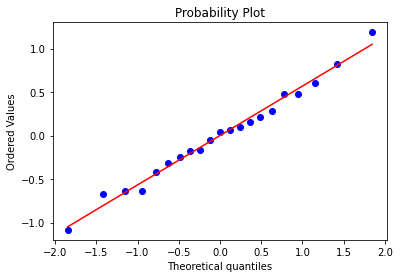

In [57]:
stats.probplot(ndf["Vaccine-Death Discrepancy"], dist="norm", plot=plt)

In [ ]:
disc_colorscale = ["#566573", "  #aab7b8", " #f0f3f4", " #58d68d", " #45b39d"]
disc_colors = chivaxbot.get_colors_dict(covid_df["Confirmed Deaths"].to_dict(), chivaxbot.deaths_colorscale, "deaths")
chivaxbot.write_svg("./images/{}/New_Jersey_Counties_Outline.svg".format(now), "./images/deaths_{}.png".format(now.date()), case_colors)

In [60]:
ndf.loc["middlesex"]

Confirmed Cases              1.513838
Confirmed Deaths             1.153948
New Confirmed Cases          2.542060
New Probable Cases           1.232339
Probable Cases               0.377204
Probable Deaths              1.383357
Vaccine Doses                1.097572
Vaccine-Case Discrepancy    -0.416267
Vaccine-Death Discrepancy   -0.056376
Name: middlesex, dtype: float64